<a href="https://colab.research.google.com/github/smpark0520/ESAA/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C_pg_431~449.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K—평균 알고리즘 이해
-  K-평균 : 군집 중심점(centroid)이라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화기법

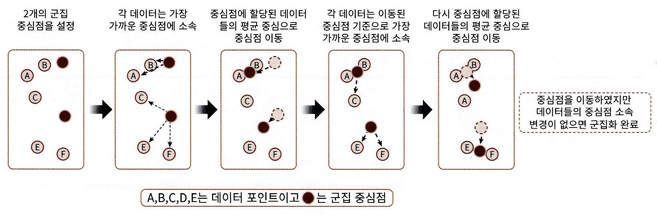

< K-평균의 장점>

- 일반적인 군집화에서 가장 많이 활용되는 알고리즘
- 알고리즘이쉽고 간결

< K-평균의 단점>
- 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어짐(이를 위해 PCA로 차원 감소를 적용해야 할 수도 있음).
- 반복을 수행하는데, 반복 횟수가 많을 경우 수행 시간이 매우 느려짐
- 몇 개의 군집(cluster)을 선택해야 할지 가이드하기가 어려움

## 사이킷런 KMeans 클래스 소개

In [ ]:
# 초기화 파라미터 :class sklearn.cluster.KMeans(n_cluster=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto')

< K-means 클래스의 중요 파라미터 >

- n_clusters: 군집화할 개수, 군집 중심점의 개수를 의미
- init: 초기에 군집 중심점의 좌표를 설정할 방식. 보통은 임의로 중심을 설정하지 않고 일반적으로 k-means++ 방식으로 최초 설정.
- max_iter: 최대 반복 횟수, 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료.
KMeans 수행 방법

사이킷런의 비지도학습 클래스와 마찬가지로 fit(데이터 세트) 또는 fit_transform(데이터 세트) 메서드를 이용.
이렇게 수행된 KMeans 객체는 군집화 수행이 완료돼 군집화와 관련된 주요 속성을 알 수가 있음.

<주요 속성>

- labels_: 데이터 포인트가 속한 군집 중심점 레이블
- cluster_centers_: 군집 중심점 좌표(Shape는 [군집 개수, 피처 개수]). 이를 이용하면 군집 중심점 좌표 시각화 가능

## K-평균을 이용한 붓꽃 데이터 세트 군집화
- 붓꽃 데이터를 이용해 K-평균 군집화 수행
- 꽃받침, 꽃잎의 길이에 따라 데이터의 군집화가 어떻게 결정되는지 확인해 보고, 이를 분류 값과 비교

In [ ]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
# 더 편한 데이터 핸들링을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


- 붓꽃 데이터 세트를 3개 그룹으로 군집화

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

- labels_ 속성값을 출력

In [ ]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


-  labels_의 값이 0, 1, 2로 돼 있으며, 이는 각 레코드가 첫 번째 군집, 두 번째 군집, 세 번째 군집에 속함

- 실제 붓꽃 품종 분류 값과 얼마나 차이가 나는지로 군집화가 효과적으로 됐는지 확인
- 붓꽃 데이터 세트의 target 값을 ‘target’ 칼럼으로, 앞에서 구한 labels_ 값을 'cluster' 칼럼으로 지정
- irisDF DataFrame에 추가한 뒤에 group by 연산을 실제 분류값인 target과 군집화 분류값인 cluster 레벨로 적용해 target과 cluster 값 개수를 비교

In [ ]:
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_
iris_result = irisDF.groupby(['target', 'cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          47
        2           3
2       0          14
        2          36
Name: sepal_length, dtype: int64


- Target 0 데이터: 1군집에 50개 모두 잘 그루핑.
- Target 1 데이터: 0군집에 47개, 2군집에 나머지 3개.
- Target 2 데이터: 0군집에 14개, 2군집에 36개로 분산.

- 붓꽃 데이터 세트의 군집화를 시각화
- 붓꽃 데이터 세트의 속성이 4개이므로 2차원 평면에 적합치 않음
- PCA 이용해 4개의 속성을 2개로 차원 축소한 뒤에 X 좌표, Y 좌표로 개별 데이터를 표현

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


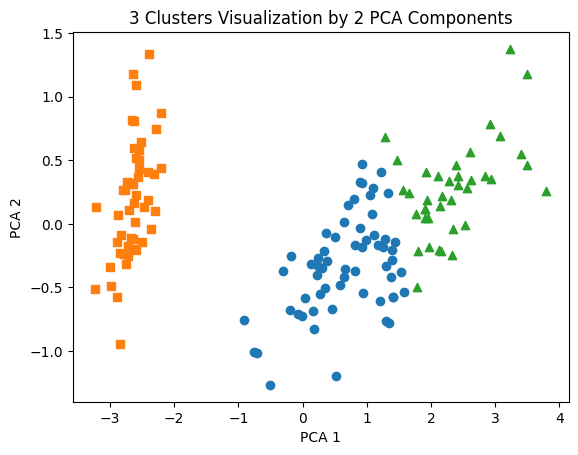

In [ ]:
# 군집 값이 0, 1, 2인 경우마다 별도의 인덱스로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# 군집 값 0, 1, 2에 해당하는 인덱스로 군집 레벨의 pca_x, pca_y 추출. o, s, ^로 마커 표시
plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

- Cluster 1을 나타내는 네모(square, 's')는 명확히 다른 군집과 분리.
- Cluster 0을 나타내는 동그라미('o')와 Cluster 2를 나타내는 세모('^')는 상당 수준 분리돼 있지만, 네모만큼 명확하지 X

## 군집화 알고리즘 테스트를 위한 데이터 생성
make_blobs( ) API

개별 군집의 중심점과 표준 편차 제어 기능이 추가돼 있음
호출하면 피처 데이터 세트와 타깃 데이터 세트가 튜플(Tuple)로 반환됨.
  
< make_blobs() 호출 파라미터 >
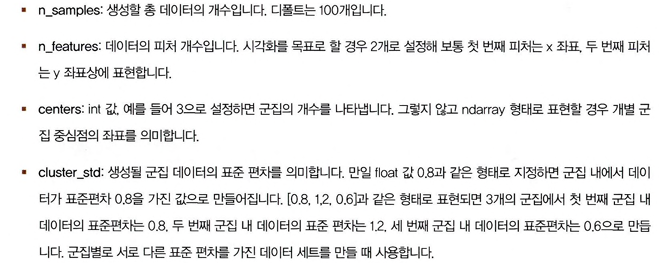


make classification( ) API

노이즈를 포함한 데이터를 만드는 유용.
여러 개의 클래스에 해당하는 데이터 세트를 생성, 하나의 클래스에 여러 개의 군집이 분포될 수 있게 데이터를 생성.

- 총 200개의 레코드와 2개의 피처가 3개의 군집화 기반 분포도를 가진 피처 데이터 세트 X와, 3개의 군집화 값을 가진 타깃 데이터 세트 y가 반환

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


- 피처 데이터 세트 X: 200개의 레코드와 2개의 피처를 가지므로 shape (200, 2)
- 군집 타깃 데이터 세트 y: shape (200,)
- 3개의 cluster 값: [0, 1, 2]이며 각각 67, 67, 66개로 균일하게 구성돼 있음

In [ ]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1','ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


- make_blob()으로 만든 피처 데이터 세트가 어떠한 군집화 분포를 가지고 만들어졌는지 확인

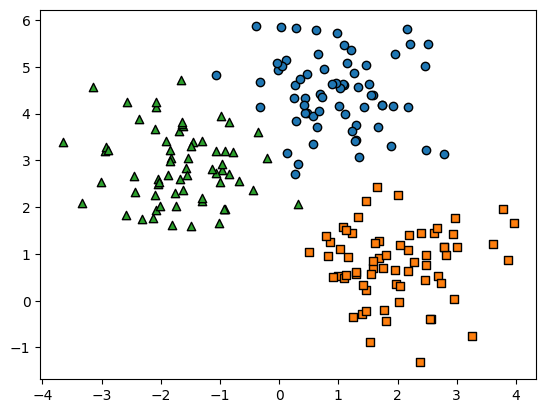

In [ ]:
target_list = np.unique(y)

# 각 타깃 별 산점도의 마커 값
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']
# 3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0, 1, 2]
# target=0, target=1, target=2로 scatter plot을 marker별로 생성.
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k',
               marker=markers[target])
plt.show()

- 만들어진 데이터 세트에 KMeans 군집화를 수행한 뒤에 군집별로 시각화

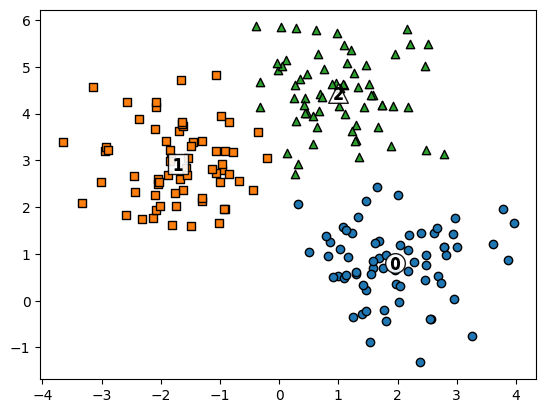

In [ ]:
# KMeans 객체를 이용해 X 데이터를 K-Means 클러스터링 수행
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF ['kmeans_label'] = cluster_labels

# cluster_centers_는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행.
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])

    # 군집별 중심 위치 좌표 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)

plt.show()

- make_blobs() 타깃과 kmeans_label은 군집 번호를 의미하므로 서로 다른 값으로 매핑될 수 있음.(그래서 산점도의 마커가 서로 다를 수 있음).

In [ ]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       2               66
        1                1
1       0               67
2       1               65
        0                1
Name: count, dtype: int64


- Target 0은 cluster label 2으로, target 1은 label 0으로, target 2는 label 1로 대부분 매핑됨.

- make_blobs(): cluster_std 파라미터로 데이터의 분포도를 조절.

# 군집 평가(Cluster Evaluation)
- 대부분의 군집화 데이터 세트는 비교할 만한 타깃 레이블을 가지고 있지 않음
- 군집화는 분류(Classification)와 유사해 보일 있으나 성격이 많이 다름
- 따라서, 군집화의 성능을 평가하는 대표적인 방법 -> 실루엣 분석

## 실루엣 분석의 개요
- 각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는지를 나타냄
- 효율적으로 분리됨: 다른 군집과의 거리는 떨어져 있고 동일 군집끼리의 데이터는 서로 가깝게 뭉쳐 있다는 의미.
- 실루엣 계수(silhouette coefficient)를 기반으로 함.
  - 실루엣 계수: 개별 데이터가 가지는 군집화 지표
  - 해당 데이터가 같은 군집 내의 데이터와 얼마나 가깝게 군집화돼 있고, 다른 군집에 있는 데이터와는 얼마나 멀리 분리돼 있는지를 나타내는 지표.

  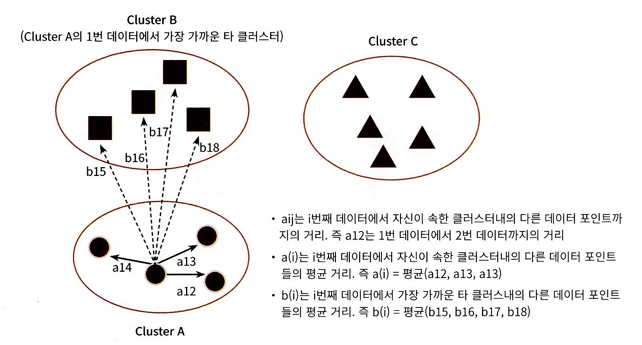

- 특정 데이터 포인트의 실루엣 계수 값
  - a(i): 해당 데이터 포인트와 같은 군집 내에 있는 다른 데이터 포인트와의 거리를 평균
  - b(i): 해당 데이터 포인트가 속하지 않은 군집 중 가장 가까운 군집과의 평균 거리
  - 두 군집 간의 거리가 얼마나 떨어져 있는가의 값은 b(i) - a(i)
  - 정규화하기 위해 MAX( a(i), b(i) ) 값으로 나눔.


< i번째 데이터 포인트의 실루엣 계수 값 s(i)>

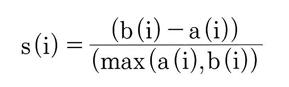

- 좋은 군집화가 되기 위해 만족해야 하는 기준 조건

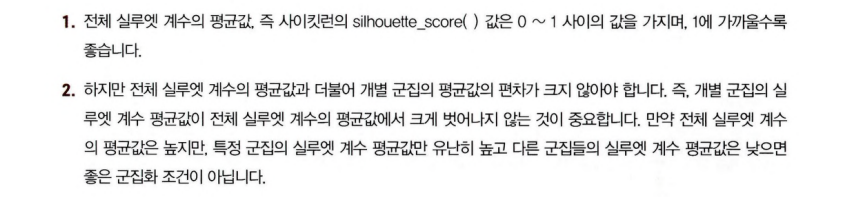

## 붓꽃 데이터 세트를 이용한 군집 평가

In [ ]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# 실루엣 분석 평가 지표 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(irisDF)
irisDF['cluster'] = kmeans.labels_

# iris 모든 개별 데이터에 실루엣 계수 값을 구함.
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples( ) return 값의 shape', score_samples.shape)

# irisDF에 실루엣 계수 칼럼 추가
irisDF ['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수 값을 구함.
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터 세트 Silhouette Analysis Score {0:.3f}'.format(average_score))
irisDF.head(3)

silhouette_samples( ) return 값의 shape (150,)
붓꽃 데이터 세트 Silhouette Analysis Score 0.551


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852582
1,4.9,3.0,1.4,0.2,1,0.814916
2,4.7,3.2,1.3,0.2,1,0.828797


- 평균 실루엣 계수 값: 0.553
  - 1 군집의 경우 평균적으로 0.8 정도의 높은 실루엣 계수 값, 하지만 다른 군집의 경우 실루엣 계수 값이 낮기 때문에 전체 평균 실루엣 계수 값이 0.553 정도가 됨.

In [ ]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

,silhouette_coeff
cluster,
0,0.422323
1,0.797604
2,0.436842


- 1 군집은 실루엣 계수 평균 값이 0.79인데 반해, 0번은 0.42, 2번은 0.43.
- 상대적으로 평균값이 1번에 비해 낮음

## 군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법


< 여러 개의 군집 개수가 주어졌을 때 이를 분석한 도표를 참고해 평균 실루엣 계수로 군집 개수를 최적화하는 방법 >

Case1: 군집의 개수 2개
평균 실루엣 계수(silhouette_score)는 0.704로 매우 높게 나타남.

  - 왼쪽 그림 -> 개별 군집에 속하는 데이터의 실루엣 계수를 2차원으로 나타낸 것. X축: 실루엣 계수 값, Y축: 개별 군집과 이에 속하는 데이터.

  - 개별 군집은 Y축에 숫자 값으로 0, 1로 표시돼 있고, 이에 해당하는 데이터는 Y축 높이로 추측 가능.

  - 점선으로 표시된 선: 전체 실루엣 계수 값. 이로 판단해 1 군집의 모든 데이터는 평균 실루엣 계수 이상이지만, 2 군집의 경우는 평균보다 적은 데이터 값이 매우 많음.

  - 오른쪽 그림 -> 1군집의 경우는 0군집과 멀리 떨어져 있고, 내부 데이터끼리도 뭉쳐 있지만 0군집의 경우는 내부 데이터끼리 많이 떨어져 있음


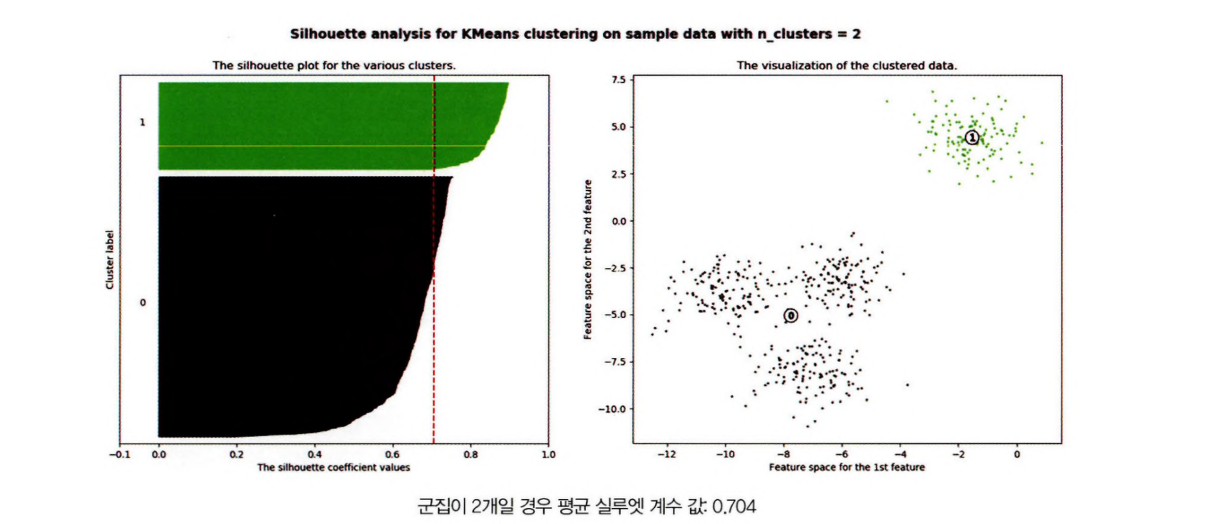

- Case2: 군집의 개수 3개
  - 전체 데이터의 평균 실루엣 계수: 0.588.
  - 왼쪽 그림 -> 1, 2 군집의 경우 평균보다 높은 실루엣 계수 값을 가지고 있지만, 0번의 경우 모두 평균보다 낮음.
  - 오른쪽 그림 -> 0번의 경우 내부 데이터 간의 거리도 멀지만, 2군집과도 가깝게 위치하고 있기 때문

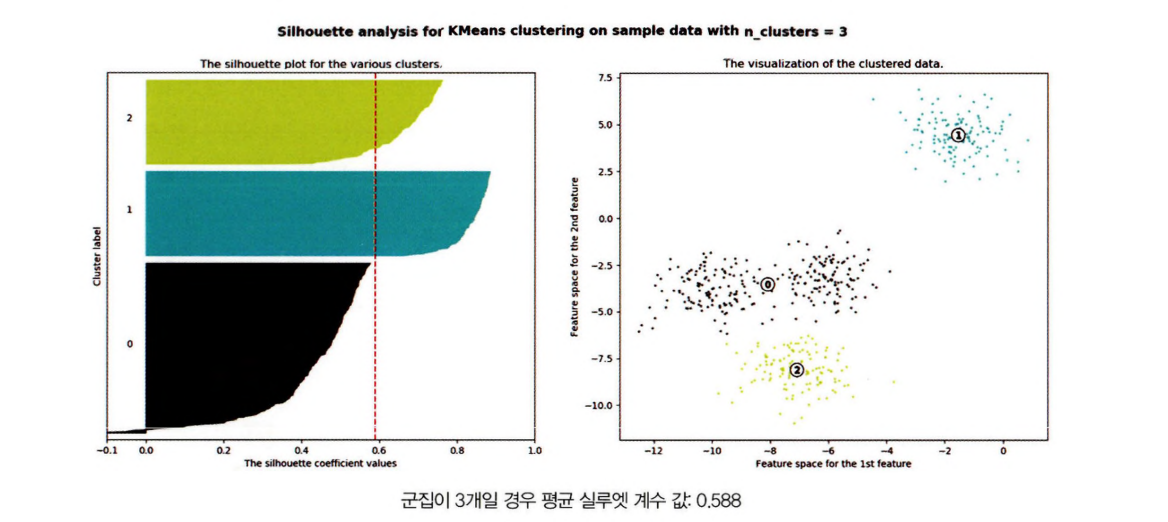

- Case3: 군집의 개수 4개
  - 전체 데이터의 평균 실루엣 계수: 0.65
  - 왼쪽 그림 -> 개별 군집의 평균 실루엣 계수 값이 비교적 균일하게 위치.
  - 1군집: 데이터가 평균보다 높은 계수 값을 가지고 있으며, 0, 2번의 경우는 절반 이상이 평균보다 높은 계수 값을, 3군집의 경우만 1/3 정도가 평균보다 높은 계수 값을 가지고 있음.
  - 군집이 2개인 경우보다는 평균 실루엣 계수 값이 작지만 4개인 경우가 가장 이상적인 군집화 개수로 판단할 있음.

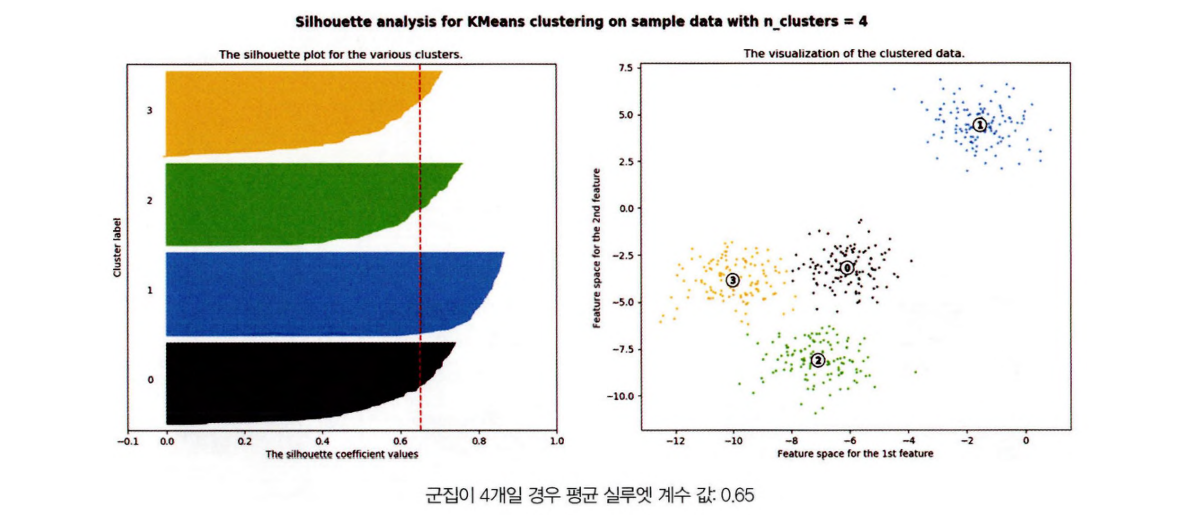

In [ ]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features):

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

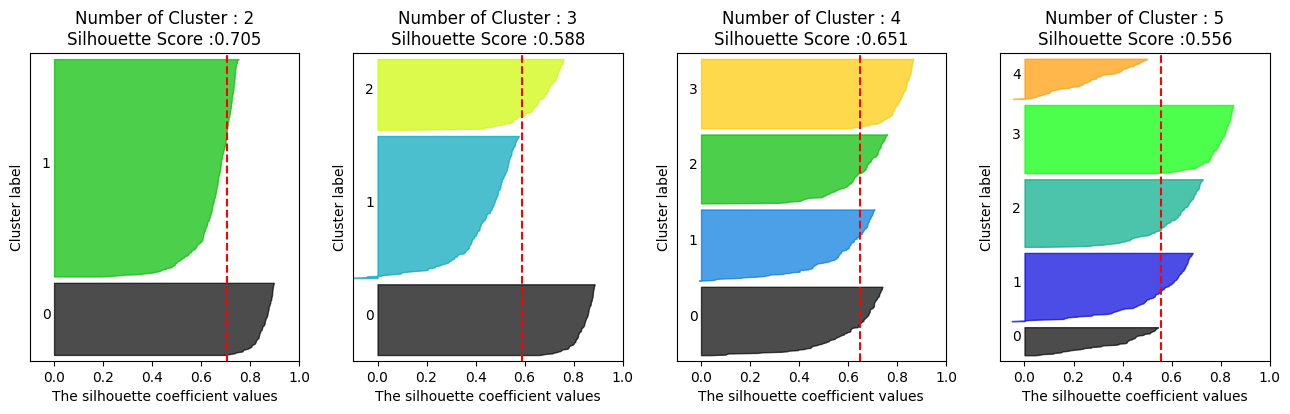

In [ ]:
# make_blobs 통해 군집화를 위한 4개의 군집 중심의 500개 2차원 데이터 세트 생성
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, center_box=(-10.0, 10.0), shuffle=True, random_state=1)

# 군집 개수가 2, 3, 4, 5개일 때의 군집별 실루엣 계수 평균값을 시각화
visualize_silhouette([2,3,4,5], X)

- 4개의 군집일 때 가장 최적이 됨

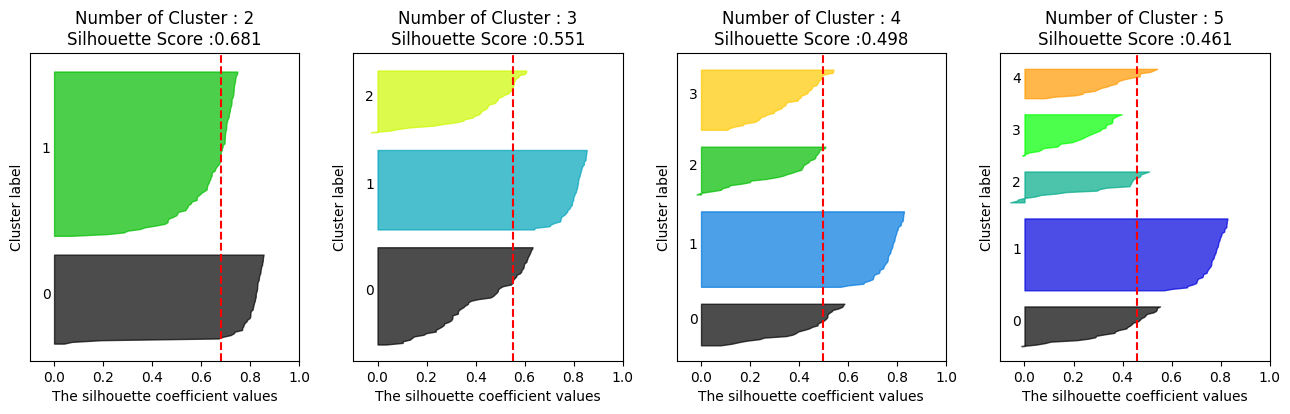

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
visualize_silhouette([2,3,4,5], iris.data)

- 2개의 군집일 때 가장 최적이 됨!
- 3,4,5개의 경우 평균 실루엣 계수 값도 2개보다 작음 & 1군집과 다른 0, 2군집과의 실루엣 계수의 편차가 큼